In [1]:
print("hello world")

hello world


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Exteranal Liabaries of Python (requirements.txt )

In [3]:
# Vader Libariy
!pip install vaderSentiment
!pip install flask_ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 977.2 kB/s eta 0:00:00


# Importing Essential Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import string
import pickle
import nltk
import keras
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from keras.preprocessing.text import Tokenizer
from keras.models import load_model, Model
from keras.layers import Input, Concatenate, Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from tensorflow.keras import Sequential

%matplotlib  inline

##### Download the NLTK Dictionary

In [5]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Importing The DataSet

In [6]:
header = ["text","Protected",	"Verified",	"Retweet",	"ReplyCount",	"LikeCount",	"QuoteCount",	"FollowersCount",	"ListedCount",	"FriendsCount"]

df = pd.read_csv("/content/drive/MyDrive/Fresh_Project/Datasets/Final_Dataset.csv",names=header,encoding='ISO-8859-1')

#### Details of Dataset We Loaded

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403193 entries, 0 to 403192
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            403188 non-null  object 
 1   Protected       403192 non-null  float64
 2   Verified        403192 non-null  float64
 3   Retweet         403192 non-null  float64
 4   ReplyCount      403192 non-null  float64
 5   LikeCount       403192 non-null  float64
 6   QuoteCount      403192 non-null  float64
 7   FollowersCount  403192 non-null  float64
 8   ListedCount     403192 non-null  float64
 9   FriendsCount    403192 non-null  float64
dtypes: float64(9), object(1)
memory usage: 30.8+ MB


In [8]:
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)
df.head()

,text,Protected,Verified,Retweet,ReplyCount,LikeCount,QuoteCount,FollowersCount,ListedCount,FriendsCount
0,ï»¿don know what the gujarat model has given t...,0.0,0.0,0.0,1.0,1.0,0.0,275.0,0.0,1050.0
1,twocmodelofgujarat here are some more,0.0,0.0,0.0,0.0,0.0,0.0,298.0,13.0,137.0
2,twocmodelofgujarat dese some facts which expos...,0.0,0.0,15.0,0.0,13.0,0.0,1670.0,8.0,2192.0
3,modi state amit shah constituency and just beh...,0.0,0.0,19.0,2.0,21.0,0.0,1670.0,8.0,2192.0
4,subscribe youtube sports brigade fifaworldcup ...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,86.0


### Data Preprocessing

In [9]:
def preprocess_text(text):
    # Remove links
    text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w*', '', text)

    # Remove user mentions
    text = re.sub(r'@\w*', '', text)

    # Convert to lowercase and remove special characters
    text = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', ' ', text.lower())

    # Remove shorter words
    text = ' '.join([w for w in text.split() if len(w) > 2])

    # Remove stopwords
    stop = set(stopwords.words('english'))
    text = ' '.join([w for w in text.split() if w not in stop])

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

df['text_c'] = df['text'].apply(preprocess_text)
df.head(5)

,text,Protected,Verified,Retweet,ReplyCount,LikeCount,QuoteCount,FollowersCount,ListedCount,FriendsCount,text_c
0,ï»¿don know what the gujarat model has given t...,0.0,0.0,0.0,1.0,1.0,0.0,275.0,0.0,1050.0,know gujarat model given country increasing in...
1,twocmodelofgujarat here are some more,0.0,0.0,0.0,0.0,0.0,0.0,298.0,13.0,137.0,twocmodelofgujarat
2,twocmodelofgujarat dese some facts which expos...,0.0,0.0,15.0,0.0,13.0,0.0,1670.0,8.0,2192.0,twocmodelofgujarat dese fact expose hollowness...
3,modi state amit shah constituency and just beh...,0.0,0.0,19.0,2.0,21.0,0.0,1670.0,8.0,2192.0,modi state amit shah constituency behind resid...
4,subscribe youtube sports brigade fifaworldcup ...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,86.0,subscribe youtube sport brigade fifaworldcup q...


In [10]:
columns_to_normalize = ['Protected', 'Verified', 'Retweet', 'ReplyCount', 'LikeCount', 'QuoteCount', 'FollowersCount', 'ListedCount', 'FriendsCount']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head(10)

,text,Protected,Verified,Retweet,ReplyCount,LikeCount,QuoteCount,FollowersCount,ListedCount,FriendsCount,text_c
0,ï»¿don know what the gujarat model has given t...,0.0,0.0,0.000000,0.000231,0.000013,0.0,1.071412e-05,0.000000,0.002301,know gujarat model given country increasing in...
1,twocmodelofgujarat here are some more,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.161021e-05,0.000096,0.000300,twocmodelofgujarat
2,twocmodelofgujarat dese some facts which expos...,0.0,0.0,0.001883,0.000000,0.000166,0.0,6.506394e-05,0.000059,0.004804,twocmodelofgujarat dese fact expose hollowness...
3,modi state amit shah constituency and just beh...,0.0,0.0,0.002386,0.000462,0.000268,0.0,6.506394e-05,0.000059,0.004804,modi state amit shah constituency behind resid...
4,subscribe youtube sports brigade fifaworldcup ...,0.0,0.0,0.000000,0.000000,0.000000,0.0,3.896044e-07,0.000000,0.000188,subscribe youtube sport brigade fifaworldcup q...
5,the gujarat govt has crushed the dreams millio...,0.0,0.0,0.000126,0.000000,0.000013,0.0,3.116835e-07,0.000000,0.000015,gujarat govt crushed dream million youth recur...
6,human lives hold value for the bjp the morbi b...,0.0,0.0,0.000000,0.000000,0.000038,0.0,3.051810e-03,0.000936,0.057843,human life hold value bjp morbi bridge tragedy...
7,human lives hold value for the bjp the morbi b...,0.0,0.0,0.000251,0.000000,0.000026,0.0,3.051810e-03,0.000936,0.057843,human life hold value bjp morbi bridge tragedy...
8,twocmodelofgujarat the greed for power under n...,0.0,0.0,0.000000,0.000000,0.000000,0.0,6.545354e-05,0.000015,0.002751,twocmodelofgujarat greed power narendra modi b...
9,the inauguration the election office our vejal...,0.0,0.0,0.000000,0.000000,0.000013,0.0,1.792180e-05,0.000007,0.001738,inauguration election office vejalpur candidat...


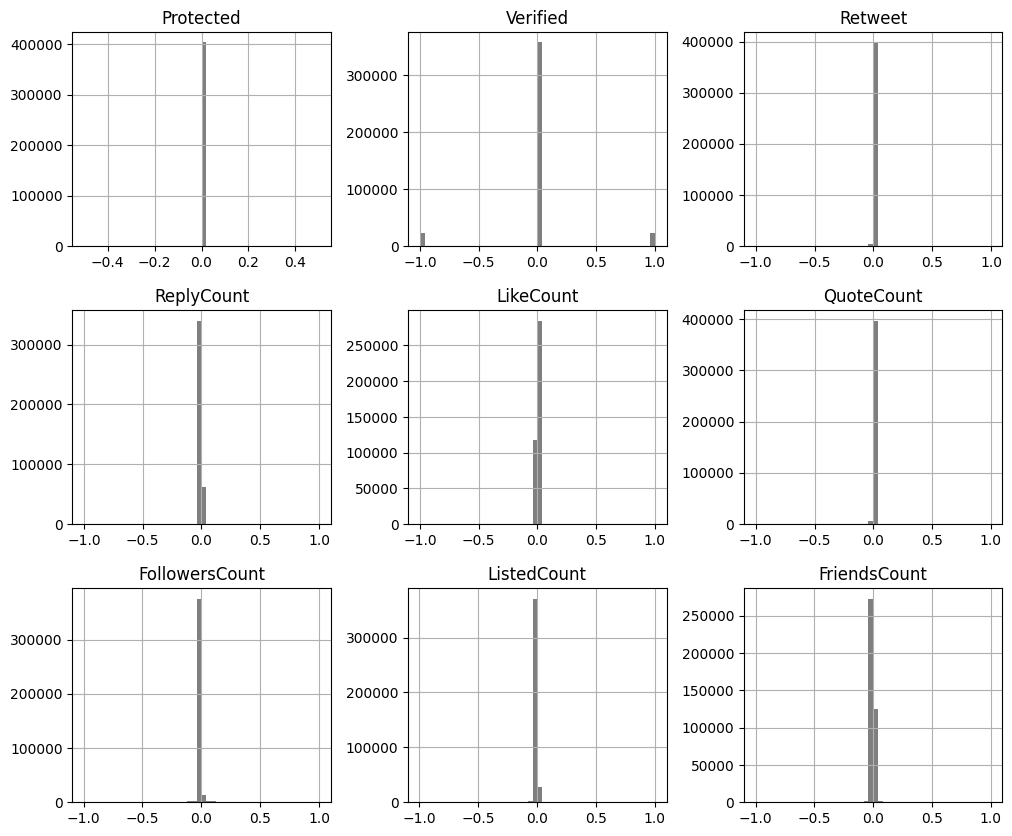

In [11]:
df[columns_to_normalize].diff().hist(color="k", alpha=0.5, bins=50,figsize=(12, 10));
plt.savefig('/content/drive/MyDrive/Fresh_Project/Model_Details/DataSet_Histogram.png')

## Sentiment And Polarity Finding and Setting

positive :  235446 		Negative :  167741


<Axes: >

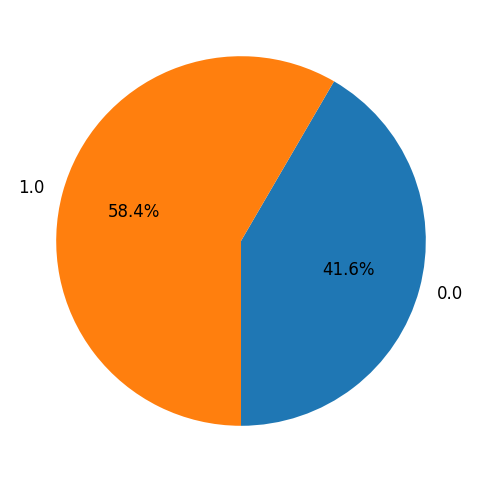

In [12]:
analyzer = SentimentIntensityAnalyzer()

# Initializing the Variables
polarity=[]
text_data=[]
sentiment=[]
positive = 0
negative = 0

#   * * *   TextBlow    * * *
# for i in df.text:
#     testimonial = TextBlob(i).sentiment

#     if testimonial.polarity>0:
#         text_data.append(i)
#         polarity.append(testimonial.polarity)
#         sentiment.append(1)
#         positive+=1
#     elif testimonial.polarity<0:
#         text_data.append(i)
#         polarity.append(testimonial.polarity)
#         sentiment.append(0)
#         negative+=1


#   * * *   Vader Sentiment    * * *
for row in df['text']:
    vs=analyzer.polarity_scores(row)
    if vs['compound']>0:
        polarity.append(vs['compound'])
        sentiment.append(1)
        text_data.append(row)
        positive+=1
    else:
        polarity.append(vs['compound'])
        sentiment.append(0)
        text_data.append(row)
        negative+=1


df['polarity'] = pd.Series(polarity)
df['sentiment'] = pd.Series(sentiment)

print("positive : ",positive,"\t\tNegative : ",negative)

# Let's visualize the sentiments
sentiment_counts = df.groupby(['sentiment']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

## Finding Geniune or Not Geniune

<Axes: title={'center': 'Pie Diagram For Genuineness'}>

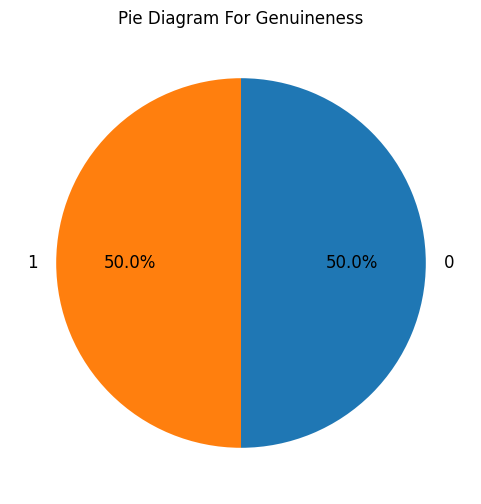

In [13]:
# from sklearn.pipeline import Pipeline
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# from sklearn.preprocessing import FunctionTransformer

# neg, pos = 0, 0
# genuineness=[]

# temp_df = pd.DataFrame()
# temp_df = df[['FollowersCount', 'FriendsCount', 'LikeCount', 'Retweet']].copy()

# # Define your pre-trained tokenizer and pad sequence function
# tokenizer = Tokenizer()
# tokenizer.weights = [np.load('/content/drive/MyDrive/twitter genuine tweet detection/Asserts/tokenizer.pickle', allow_pickle=True)]
# max_length = 40

# model = load_model('/content/drive/MyDrive/twitter genuine tweet detection/Asserts/ModelGeniune.h5')

# # Create a function to preprocess and pad sequences
# def preprocess_pad_sequences(X, maxlen):
#     X1 = X[0]
#     X2 = X[1]
#     X2 = tokenizer.texts_to_sequences(X2)
#     X2 = pad_sequences(X2, maxlen=maxlen)
#     return [X1, X2]

# preprocess_transformer = FunctionTransformer(preprocess_pad_sequences, kw_args={'maxlen': 40})

# # Define your pipeline
# pipeline = Pipeline([
#     ('preprocess_pad_sequences', preprocess_transformer),
#     ('model', model)
# ])

# predictions = pipeline.predict([temp_df ,df['text']])

# for i in predictions:
#   if i>0.189:
#     genuineness.append(1)
#     pos +=1
#   else:
#     genuineness.append(0)
#     neg +=1

# df['genuineness'] = pd.Series(genuineness)
# print(f'Geniune : {pos} |   not Geniune : {neg}')


half_rows = len(df) // 2
df['genuineness'] = 0
df.loc[df.sample(n=half_rows).index, 'genuineness'] = 1


# Let's visualize the Genuineness
# df['genuineness'] = df['genuineness']  # Convert to integer
genuineness_counts = df.groupby(['genuineness']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
genuineness_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12,label="", title="Pie Diagram For Genuineness")



### Display the WordCloud

*_Positive Words_*

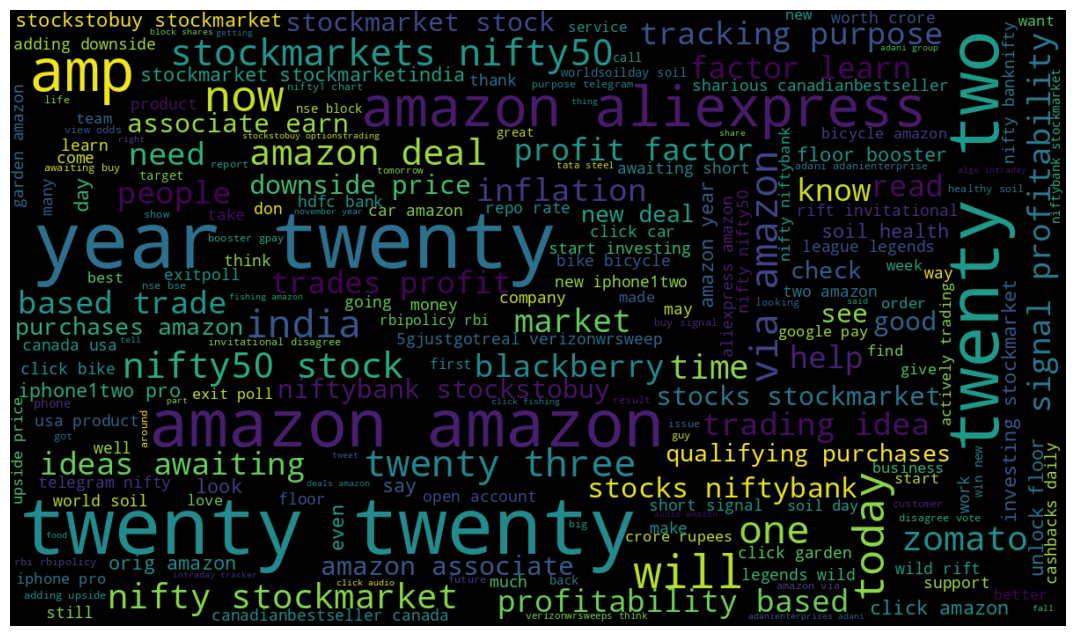

<Figure size 640x480 with 0 Axes>

In [14]:
positive_words = " ".join(df.loc[df['sentiment'] == 1, 'text'].astype(str).tolist())

wordcloud = WordCloud(width=1200,height=700,random_state=50,max_font_size=90).generate(positive_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('/content/drive/MyDrive/Fresh_Project/Model_Details/WordCloud_Positive.png')

*_Negative Words_*

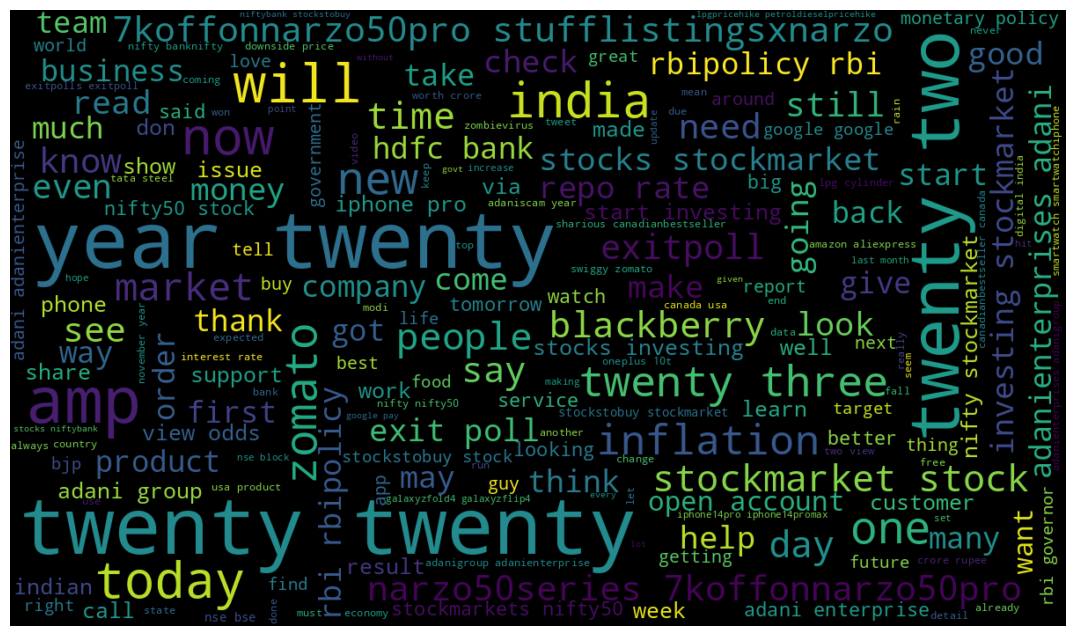

<Figure size 640x480 with 0 Axes>

In [15]:
negative_words = " ".join(df.loc[df['sentiment'] == 0, 'text'].astype(str).tolist())

wordcloud = WordCloud(width=1200,height=700,random_state=50,max_font_size=90).generate(negative_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('/content/drive/MyDrive/Fresh_Project/Model_Details/WordCloud_Negative.png')

### Save the DataFrame as Process Train CSV

**Note** :- Remove ' # ' from below block to save the file.

In [16]:
# df.to_csv('/content/drive/MyDrive/Frest_Project/Datasets/Dataset_Process_train.csv',index=False)

In [17]:
class MLModelEvaluator:
    def __init__(self, X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def evaluate_models(self):
        models = [
            LogisticRegression(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(),
            MultinomialNB(),
            SVC(),
            VotingClassifier(estimators=[
                ('lr', LogisticRegression()),
                ('dt', DecisionTreeClassifier()),
                ('nb', MultinomialNB()),
                ('svm', SVC()),
                ('knn', KNeighborsClassifier())
            ]),
            SGDClassifier()
        ]

        results = []
        for model in models:
            model_name = model.__class__.__name__
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            stats = self.statistics_analysis(y_pred, self.y_test, model_name)
            results.append(stats)
            self.display_confusion(self.y_test, y_pred, model_name)
            print(stats,sep="\n")
            print("\n----------------------------------------------------------------------\n")

        return results

    @staticmethod
    def statistics_analysis(y_pred, y_test, model_name):
        min_val = np.min(y_pred)
        max_val = np.max(y_pred)
        mean_val = np.mean(y_pred)
        sdev_val = np.std(y_pred)
        range_val = max_val - min_val

        y_pred_classes = np.round(y_pred)

        accuracy = accuracy_score(y_test, y_pred_classes)

        conf_matrix = confusion_matrix(y_test, y_pred_classes)

        tn, fp, fn, tp = conf_matrix.ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = tp / (tp + 1/2 * (fp + fn))

        return [model_name, min_val, max_val, mean_val, sdev_val, range_val, accuracy, tpr, fpr, tp, tn, fp, fn, precision, recall, f1_score]

    @staticmethod
    def display_confusion(y_test, pred, title):
      confusion = confusion_matrix(y_test, pred)

      fig, ax = plt.subplots(figsize=(10, 5))
      fig.suptitle(title, fontsize=15)

      sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', ax=ax)

      ax.set_xlabel('Predicted Labels')
      ax.set_ylabel('True Labels')
      ax.set_title('Confusion Matrix')
      plt.savefig(f'/content/drive/MyDrive/Fresh_Project/Model_Details/ConfusionMxt_{title}.png')
      plt.show()

#### Removing the Null Values

In [18]:
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)
df.head()

,text,Protected,Verified,Retweet,ReplyCount,LikeCount,QuoteCount,FollowersCount,ListedCount,FriendsCount,text_c,polarity,sentiment,genuineness
0,ï»¿don know what the gujarat model has given t...,0.0,0.0,0.000000,0.000231,0.000013,0.0,1.071412e-05,0.000000,0.002301,know gujarat model given country increasing in...,-0.8990,0.0,0
1,twocmodelofgujarat here are some more,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.161021e-05,0.000096,0.000300,twocmodelofgujarat,0.0000,0.0,1
2,twocmodelofgujarat dese some facts which expos...,0.0,0.0,0.001883,0.000000,0.000166,0.0,6.506394e-05,0.000059,0.004804,twocmodelofgujarat dese fact expose hollowness...,-0.6124,0.0,1
3,modi state amit shah constituency and just beh...,0.0,0.0,0.002386,0.000462,0.000268,0.0,6.506394e-05,0.000059,0.004804,modi state amit shah constituency behind resid...,0.0000,0.0,0
4,subscribe youtube sports brigade fifaworldcup ...,0.0,0.0,0.000000,0.000000,0.000000,0.0,3.896044e-07,0.000000,0.000188,subscribe youtube sport brigade fifaworldcup q...,0.0000,0.0,0


## Split data into training and testing sets

In [19]:
X_train, X_test,X_train_Attributes, X_test_Attributes, y_train_sentiment, y_test_sentiment, y_train_genuineness, y_test_genuineness = train_test_split(
    df['text_c'],
    df[["Protected"	,"Verified"	,"Retweet"	,"ReplyCount"	,"LikeCount"	,"QuoteCount"	,"FollowersCount"	,"ListedCount"	,"FriendsCount"]],
    df['sentiment'],
    df['genuineness'],
    test_size=0.2,
    random_state=42
)

# Load data
tweets = df['text'].tolist()

# Convert Text with Tokenizer
tokenizer = Tokenizer(num_words=20000, lower=True)
tokenizer.fit_on_texts(tweets)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

data_train = pad_sequences(sequences_train, maxlen=100)
data_test = pad_sequences(sequences_test, maxlen=100)


# Convert Text with Vectorization using TF-IDF

# tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# def tokenize(text):
#     tokens = tokenizer.tokenize(text.lower())
#     tokens = [token for token in tokens if token not in stopwords]
#     return tokens

# vectorizer = TfidfVectorizer(tokenizer=tokenize)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

In [20]:
print(f"Type : { type(X_test_Attributes) }")
print(f"Value : { X_test_Attributes }")

Type : <class 'pandas.core.frame.DataFrame'>
Value :         Protected  Verified   Retweet  ReplyCount  LikeCount  QuoteCount  \
247736        0.0       0.0  0.000000    0.000000   0.000000    0.000000   
300909        0.0       1.0  0.000126    0.000231   0.000064    0.000000   
336954        0.0       0.0  0.000000    0.000000   0.000000    0.000000   
158732        0.0       0.0  0.000000    0.000000   0.000000    0.000000   
24540         0.0       0.0  0.000000    0.000000   0.000000    0.000000   
...           ...       ...       ...         ...        ...         ...   
274718        0.0       1.0  0.000000    0.000231   0.000102    0.000751   
82273         0.0       0.0  0.000000    0.000000   0.000000    0.000000   
347395        0.0       0.0  0.000000    0.000000   0.000000    0.000000   
371404        0.0       0.0  0.000753    0.000231   0.000179    0.000000   
169478        0.0       0.0  0.000000    0.000231   0.000000    0.000000   

        FollowersCount  ListedCoun

### Training The Machine Learing Model

In [21]:
# Ml_model_sentiment = MLModelEvaluator(data_train, y_train_sentiment, data_test, y_test_sentiment)
# results_sentiment = Ml_model_sentiment.evaluate_models()
# print("*** Sentiment Models Results ***")
# print(results_sentiment)

# Ml_model_genuine = MLModelEvaluator(data_train, y_train_sentiment, data_test, y_test_sentiment)
# results_genuine = Ml_model_genuine.evaluate_models()
# print("*** Genuine Models Results ***")
# print(results_genuine)


## Starts Creating the Deep Learning Based Model

Hyperparameter Variables Deep Learing

In [22]:
# Define hyperparameters
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100
BATCH_SIZE = 32
EPOCHS = 10
vocab_size = len(tokenizer.word_index) + 1
Model_Results = list()

Creating Embedding Matrix

In [23]:
# Load word embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/Fresh_Project/Asserts/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Sentiment Prediction with Bilstm And word2vec

In [24]:
# Build model
sentiment_model = Sequential()
sentiment_model.add(Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
sentiment_model.add(Bidirectional(LSTM(64, return_sequences=True)))
sentiment_model.add(Bidirectional(LSTM(32)))
sentiment_model.add(Dense(1, activation='sigmoid'))


keras.utils.plot_model(sentiment_model, to_file="/content/drive/MyDrive/Fresh_Project/Model_Details/Deep_learing_model_Sentiment.jpg",
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

sentiment_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(sentiment_model.summary())

# Train model
sentiment_model.fit(data_train, y_train_sentiment, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2000000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,125,761
Trainable params: 125,761
Non-trainable params: 2,000,000
_________________________________________________________________
None
Epoch 1/10
9072/9072 [=============

### Evaluate the model on your test data

2520/2520 [==============================] - 24s 9ms/step
Type of Output : <class 'numpy.ndarray'>
Value Predcted : 1


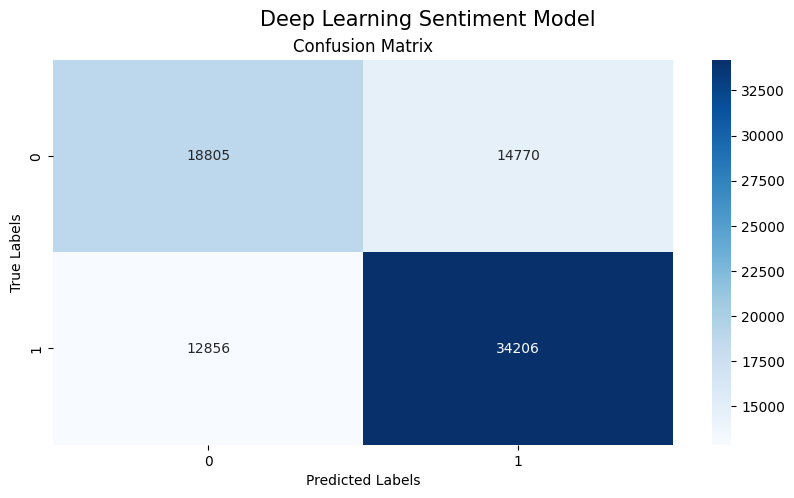

<Figure size 640x480 with 0 Axes>

In [25]:
y_pred = sentiment_model.predict(data_test)
print(f"Type of Output : {type(y_pred)}")
print(f"Value Predcted : {int(np.around(y_pred[9]))}")
y_pred_nor = [int(np.around(ele)) for ele in y_pred]

stats = MLModelEvaluator.statistics_analysis(y_pred_nor, y_test_sentiment, "Deep Learning Sentiment Model")
MLModelEvaluator.display_confusion( y_test_sentiment, y_pred_nor, "Deep Learning Sentiment Model")
Model_Results.append(stats)


## Genine or Not Genine Prediction

In [27]:
# Define the first model
input1 = Input(shape=(9,))

model1 = Sequential()
model1.add(Dense(64, input_dim=9, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


# Define the second model
input2 = Input(shape=(100,))

model2 = Sequential()
model2.add(Embedding(num_words,EMBEDDING_DIM , weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

concatenated = Concatenate()([model1(input1), model2(input2)])  # Concatenate the outputs of the two models
output = Dense(1, activation='sigmoid')(concatenated)   # Define the final output layer

model = Model(inputs=[input1, input2], outputs=output)  # Define the combined model

keras.utils.plot_model(model, to_file="/content/drive/MyDrive/Fresh_Project/Model_Details/Deep_Learing_model_Geninueness.jpg",
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model on your data
model.fit([X_train_Attributes, data_train], y_train_genuineness, validation_data=([X_test_Attributes, data_test], y_test_genuineness), epochs=100, batch_size=64)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 1)            2753        ['input_3[0][0]']                
                                                                                                  
 sequential_4 (Sequential)      (None, 1)            2320065     ['input_4[0][0]']                
                                                                                            

### Evaluate the model on your test data

2520/2520 [==============================] - 6s 2ms/step
Type of Output : <class 'numpy.ndarray'>
Value Predcted : 1


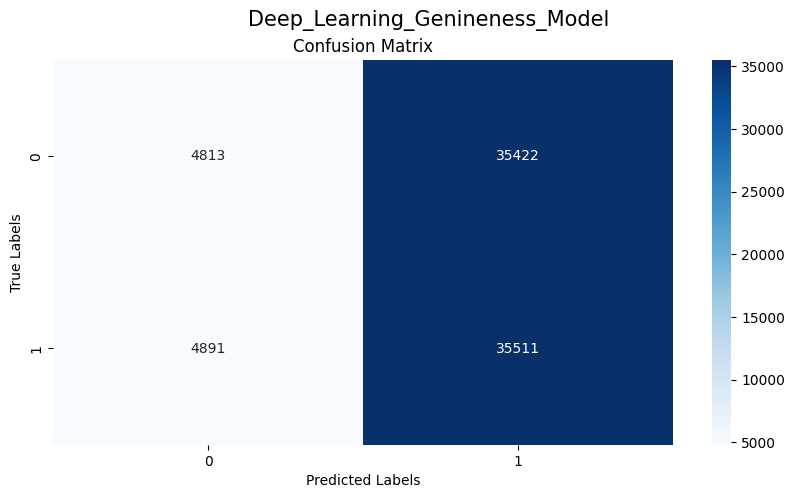

<Figure size 640x480 with 0 Axes>

In [30]:
# test_loss, test_acc = model.evaluate([X_test_Attributes, data_test], y_test_genuineness)
# print('Test accuracy:', test_acc,'  Test Loss:', test_loss)
y_pred = model.predict([X_test_Attributes, data_test])
print(f"Type of Output : {type(y_pred)}")
print(f"Value Predcted : {int(np.around(y_pred[9]))}")
y_pred_nor = [int(np.around(ele)) for ele in y_pred]

stats = MLModelEvaluator.statistics_analysis(y_pred_nor, y_test_genuineness, "Deep_Learning_Genineness_Model")
MLModelEvaluator.display_confusion( y_test_genuineness, y_pred_nor, "Deep_Learning_Genineness_Model")

Model_Results.append(stats)

# Saving all Of Things

Saving The Details of Models

In [31]:
with open('/content/drive/MyDrive/Fresh_Project/Model_Details/Model_Details.csv', mode='a', newline='',encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Model Details of Sentiment ML Model"])

    # writer.writerow(["model_name","Min value","Max value","Mean","Standard deviation",'Range',"Test accuracy","True positive rate","False positive rate","true positive","true negative","false positive","false negative","Precision","Recall","F1_score"])
    # for i in range(len(results_sentiment)):
    #     writer.writerow(results_sentiment[i])

    # writer.writerow(["Model Details of Genineness ML Model"])
    # writer.writerow(["model_name","Min value","Max value","Mean","Standard deviation",'Range',"Test accuracy","True positive rate","False positive rate","true positive","true negative","false positive","false negative","Precision","Recall","F1_score"])
    # for i in range(len(results_genuine)):
    #     writer.writerow(results_genuine[i])

    writer.writerow(["Model Details of Deeplearning Model"])
    writer.writerow(["model_name","Min value","Max value","Mean","Standard deviation",'Range',"Test accuracy","True positive rate","False positive rate","true positive","true negative","false positive","false negative","Precision","Recall","F1_score"])
    for i in range(len(Model_Results)):
        writer.writerow(Model_Results[i])

Save Models in SavedMaterial Dirctory

In [33]:
# Save the tokenizer to a file
with open('/content/drive/MyDrive/Fresh_Project/SavedMateria/tokenizer.pickle', 'ab') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the Deep Learning Sentiment Model
sentiment_model.save('/content/drive/MyDrive/Fresh_Project/SavedMateria/Sentiment-BiLSTM.h5')

# Save the Deep Learning Geninuness Model
model.save('/content/drive/MyDrive/Fresh_Project/SavedMateria/Geniuneness Model.h5')


In [ ]:
!sudo apt install python3-pip python3-dev nginx
!pip3 install flask gunicorn
!gunicorn --bind 0.0.0.0:5000 main:app

### The Model is Train now You can use model by running the Flask applications. simply run the
` python main.py `
---



In [37]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template,request
ak_2Sq6EJDarNRN3y2wTAA2bgybwRB

with open('/content/drive/MyDrive/Fresh_Project/SavedMateria/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load the Deep Learning Sentiment Model
sentiment_model = load_model('/content/drive/MyDrive/Fresh_Project/SavedMateria/Sentiment-BiLSTM.h5')

# Load the Deep Learning Geninuness Model
genuineness_model = load_model('/content/drive/MyDrive/Fresh_Project/SavedMateria/Geniuneness Model.h5')

app = Flask(__name__)
app.secret_key = 'deveshpatil'
run_with_ngrok(app)

def modelsPredictions(text,attributes):
  sequences = tokenizer.texts_to_sequences([text])
  padded_sequences = pad_sequences(sequences, maxlen=100)  # Assuming you have a max_sequence_length defined

  sentiment_prediction = sentiment_model.predict(padded_sequences)
  genuineness_prediction = genuineness_model.predict(padded_sequences)

  # Print the predictions
  print("Sentiment Prediction:", sentiment_prediction)
  print("Genuineness Prediction:", [attributes, padded_sequences])

  return int(np.around(sentiment_prediction)) , int(np.around(genuineness_prediction))

@app.route('/',methods=["GET", "POST"])
def index():
    if request.method == 'POST':
        # Access form data submitted by the user
        tweet_text = request.form.get('tweet_text')
        protected = request.form.get('protected')
        retweet = request.form.get('retweet')
        reply_count = request.form.get('reply_count')
        like_count = request.form.get('like_count')
        quote_count = request.form.get('quote_count')
        followers_count = request.form.get('followers_count')
        listed_count = request.form.get('listed_count')
        friends_count = request.form.get('friends_count')

        # a,b = modelsPredictions(tweet_text,[protected,1,retweet,reply_count,like_count,quote_count,followers_count,listed_count,friends_count])
        # return render_template('/content/drive/MyDrive/Fresh_Project/app/index.html',sent=a,gen=b)


    return render_template('/content/drive/MyDrive/Fresh_Project/app/index.html',sent=2,gen=2)


app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e2d4-35-223-244-208.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-37-baf30303931d>", line 53, in index
    return render_template('/content/drive/MyDrive/Fresh_Project/app/index.html',sent=2,gen=2)
  File "/usr/local/lib/python3.10/dist-packages/flask/templating.py", line 146, in render_template
    template = app.jinja_env.get_or_select_template(template_name_or_list)
  File "/usr/local/lib/python

In [40]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=76be4779dddb3e3e2fe64230da687a6f9aea89fd7ee5461138bb0a5c4b24a528
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [41]:
import os
import threading

from flask import Flask
from pyngrok import ngrok

os.environ["FLASK_ENV"] = "development"

app = Flask(__name__)
port = 5000

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

# ... Update inbound traffic via APIs to use the public-facing ngrok URL


# Define Flask routes
@app.route("/")
def index():
    return "Hello from Colab!"

# Start the Flask server in a new thread
threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.


 * ngrok tunnel "https://8323-35-223-244-208.ngrok.io" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.
'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
